<a href="https://colab.research.google.com/github/solihatuljannah/UAS-Kelompok-12/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


import library

In [2]:
#uploaded = files.upload()
dataset = pd.read_csv('https://raw.githubusercontent.com/solihatuljannah/UAS-Kelompok-12/main/data_cancer.csv')
dataset.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


mengupload dataset

In [3]:
dataset.shape

(569, 33)

In [4]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [6]:
x = dataset.iloc[:, 2:31].values
y = dataset.iloc[:, 1].values


In [7]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [8]:
print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

dataset :  (569, 32)
x :  (569, 29)
y :  (569,)


In [9]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy is  0.9736842105263158


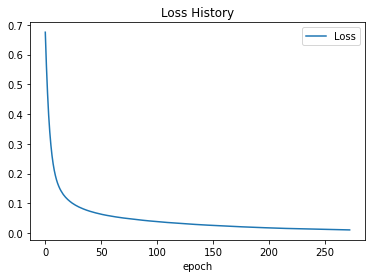

In [10]:
import matplotlib.pyplot as plt

plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

membagi dataset menjadi dependent dan independent data

# LDA data banyak


In [11]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_rlda = lda.fit(x,y).transform(x)
rldaDf = pd.DataFrame(data = x_rlda)
rldaDf.head()

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


,0
0,3.400572
1,2.075583
2,3.799135
3,3.937610
4,2.213533


In [13]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()


,target
0,M
1,M
2,M
3,M
4,M


In [14]:
finalDf = pd.concat([rldaDf, pd_y[['target']]], axis = 1)
finalDf.head()

,0,target
0,3.400572,M
1,2.075583,M
2,3.799135,M
3,3.937610,M
4,2.213533,M


Text(0.5, 1.0, 'plt lda')

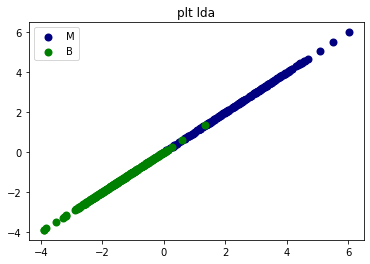

In [15]:
import matplotlib.pyplot as plt

plt.figure()
colors = ['navy','green','red']
targets = ['M', 'B']
lw=2
for color,i,target_name in zip(colors,['M','B'],targets):
  plt.scatter(x_rlda[y==i,0],x_rlda[y==i,0],color=color,lw=lw,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('plt lda')

In [16]:
X2=dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
Y2=dataset[['diagnosis']]

In [17]:
X2 = StandardScaler().fit_transform(X2)

In [18]:
X2.shape

(569, 5)

In [19]:
lda2 = LinearDiscriminantAnalysis(n_components=2)
x_rlda2 = lda2.fit(X2,Y2).transform(X2)
rldaDf2 = pd.DataFrame(data = x_rlda2)
rldaDf2.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


,0
0,4.612970
1,1.920728
2,2.524220
3,1.256970
4,1.795790


In [20]:
finalDf2 = pd.concat([rldaDf2, dataset[['diagnosis']]], axis = 1)
finalDf2.head()

,0,diagnosis
0,4.612970,M
1,1.920728,M
2,2.524220,M
3,1.256970,M
4,1.795790,M


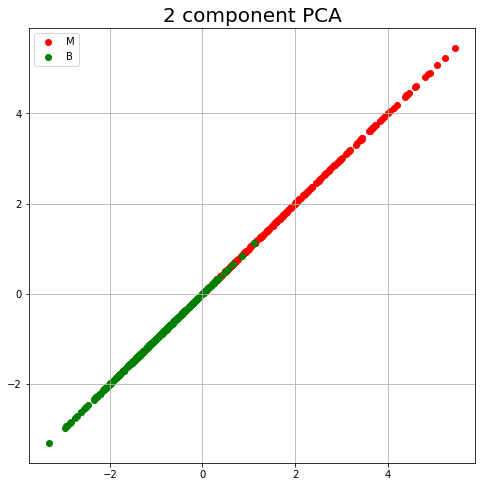

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['diagnosis'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 0]
               , finalDf2.loc[indicesToKeep, 0]
               , c = color)
ax.legend(targets)
ax.grid()

In [22]:
dataset_clas1 = finalDf
y_clas1 = dataset_clas1['target']
x_clas1 = dataset_clas1.drop(['target'], axis=1)

print ("dataset : ",dataset_clas1.shape)
print ("x : ",x_clas1.shape)
print ("y : ",y_clas1.shape)

dataset :  (569, 2)
x :  (569, 1)
y :  (569,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_clas1, y_clas1, test_size = 0.2, random_state = 42)

membagi data train dan data test

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

In [26]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

accuracy is  0.9824561403508771


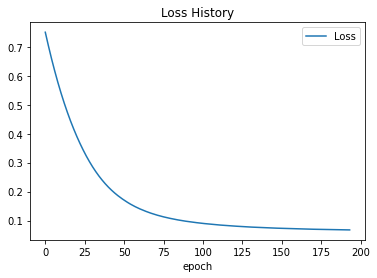

In [27]:
import matplotlib.pyplot as plt

plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])